In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import gridspec, rc, ticker
import pdb

mpl.rc('font',**{'family':'serif','serif':['Computer Modern']})
mpl.rcParams['font.size'] = 20.0
rc('text', usetex=True)

In [64]:
from jakely import colorize

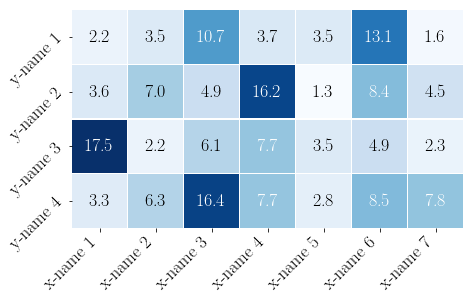

In [195]:
# Dimensions
Nx = 7
Ny = 4

# Create test data
data = np.ones([Nx, Ny])
for ix in range(Nx):
    for iy in range(Ny):
        data[ix, iy] = data[ix, iy] * np.fabs(np.random.randn()) * 10.0
xlabels = ["x-name %i" %(i+1) for i in range(Nx)]
ylabels = ["y-name %i" %(i+1) for i in range(Ny)]

# Keyword args
savename = os.path.join("/Users/Jake/Desktop/", "tableplot.pdf")
labelfontsize = 18
labelrotation = 45
spacing = 0.025
colormap = "Blues"
fmt = "%.1f"
title = None

# Create vector from 2d data
datav = data.reshape([-1])

# Get colormap for data range
vcolors, smap, cnorm = colorize(datav, cmap=colormap)

fig, ax = plt.subplots(Ny ,Nx, figsize = (Nx,Ny))

if title is not None:
    fig.suptitle(title, va = "top")

plt.subplots_adjust(wspace=spacing, hspace=spacing)

for ix in range(Nx):
    for iy in range(Ny):
        # Remove all ticks
        ax[iy, ix].set_xticks([])
        ax[iy, ix].set_yticks([])
        # Set boxcolor
        boxcolor = smap.cmap(cnorm(data[ix, iy]))
        ax[iy, ix].set_facecolor(boxcolor)
        # Set textcolor
        R = smap.cmap(cnorm(data[ix, iy]))[0] * 255 
        G = smap.cmap(cnorm(data[ix, iy]))[1] * 255
        B = smap.cmap(cnorm(data[ix, iy]))[2] * 255
        grey = (R*0.299 + G*0.587 + B*0.114)
        if grey > 186: 
            textcolor = "#000000" 
        else: 
            textcolor = "#ffffff"
        ax[iy, ix].text(0.5, 0.5, fmt %data[ix, iy], ha="center", va="center", 
                        bbox=dict(boxstyle="square", fc="w", ec="w", alpha=0.0),
                        color = textcolor)
        # get rid of the frame
        for spine in ax[iy, ix].spines.values():
            spine.set_visible(False)
        
for ix in range(Nx):
    ax[-1,ix].set_xticks([0.5])
    ax[-1,ix].set_xticklabels([xlabels[ix]], rotation = labelrotation, fontsize = labelfontsize, ha = "right")
    
for iy in range(Ny):
    ax[iy,0].set_yticks([0.5])
    ax[iy,0].set_yticklabels([ylabels[iy]], rotation = labelrotation, fontsize = labelfontsize, ha = "right")
        
fig.savefig(savename, bbox_inches = "tight")

In [205]:
def ColorTable(xlabels, ylabels, data, savename = None, 
               labelfontsize = 18, labelrotation = 45, 
               spacing = 0.025, colormap = "Blues", 
               fmt = "%.1f", title = None):
    '''
    Creates a `matplotlib.pyplot` version of a simple 2D 
    table, where the values in each cell are color coded 
    for easy viewing.
    '''
    
    assert len(xlabels) == data.shape[0]
    assert len(ylabels) == data.shape[1]
    
    # Dimensions
    Nx = len(xlabels)
    Ny = len(ylabels) 
    
    # Create vector from 2d data
    datav = data.reshape([-1])

    # Get colormap for data range
    vcolors, smap, cnorm = colorize(datav, cmap=colormap)

    # Create figure
    fig, ax = plt.subplots(Ny ,Nx, figsize = (Nx,Ny))

    # Set title, optional
    if title is not None:
        fig.suptitle(title, va = "top")

    # Adjust spacing
    plt.subplots_adjust(wspace=spacing, hspace=spacing)

    # Loop over grid cells
    for ix in range(Nx):
        for iy in range(Ny):
            
            # Remove all ticks
            ax[iy, ix].set_xticks([])
            ax[iy, ix].set_yticks([])
            
            # Set boxcolor
            boxcolor = smap.cmap(cnorm(data[ix, iy]))
            ax[iy, ix].set_facecolor(boxcolor)
            
            # Get RGB
            R = smap.cmap(cnorm(data[ix, iy]))[0] * 255 
            G = smap.cmap(cnorm(data[ix, iy]))[1] * 255
            B = smap.cmap(cnorm(data[ix, iy]))[2] * 255
            
            # Calculate grey "brightness"
            grey = (R*0.299 + G*0.587 + B*0.114)
            
            # Set text color based on brightness
            if grey > 186: 
                textcolor = "#000000" 
            else: 
                textcolor = "#ffffff"
            
            # Add text to plot
            ax[iy, ix].text(0.5, 0.5, fmt %data[ix, iy], ha="center", va="center", 
                            bbox=dict(boxstyle="square", fc="w", ec="w", alpha=0.0),
                            color = textcolor)
            
            # Get rid of the axis frame
            for spine in ax[iy, ix].spines.values():
                spine.set_visible(False)

    # Loop over x
    for ix in range(Nx):
        # Set tick to be in middle
        ax[-1,ix].set_xticks([0.5])
        # Set tick label by user provided
        ax[-1,ix].set_xticklabels([xlabels[ix]], rotation = labelrotation, fontsize = labelfontsize, ha = "right")

    # Loop over y
    for iy in range(Ny):
        # Set tick to be in middle
        ax[iy,0].set_yticks([0.5])
        # Set tick label by user provided
        ax[iy,0].set_yticklabels([ylabels[iy]], rotation = labelrotation, fontsize = labelfontsize, ha = "right")

    # Save figure, optional
    if savename is not None:
        fig.savefig(savename, bbox_inches = "tight")
    
    return fig, ax

In [216]:
import requests

word_site = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"

response = requests.get(word_site)
WORDS = response.content.splitlines()

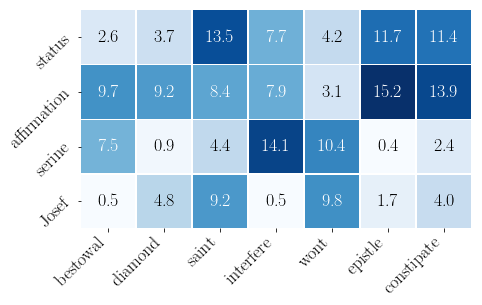

In [219]:
# Dimensions
Nx = 7
Ny = 4

# Create test data
data = np.ones([Nx, Ny])
for ix in range(Nx):
    for iy in range(Ny):
        data[ix, iy] = data[ix, iy] * np.fabs(np.random.randn()) * 10.0

# Set label names        
xlabels = [np.random.choice(WORDS) for i in range(Nx)]
ylabels = [np.random.choice(WORDS) for i in range(Ny)]

fig, ax = ColorTable(xlabels, ylabels, data, os.path.join("/Users/Jake/Desktop/", "colortable.pdf"))

In [221]:
fig.savefig("../examples/colortable.png", bbox_inches = "tight", dpi = 500)